<a href="https://colab.research.google.com/github/shannonyanes/IS4487/blob/main/Labs/Scripts/lab3_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 3

## Outline

Repeat exercises from Lab 2, but with the *SuperStore Retail Orders* dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab3_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
from matplotlib import pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

print (df)

Mounted at /content/gdrive
      customer_id      customer_name          address_line_1          city  \
0              67      Gordy Matteau     59 Northland Circle    Wilmington   
1             201     Cort Paskerful         769 Buell Drive    Huntsville   
2              45    Willetta Lumley       41 Ridgeway Alley        Irvine   
3             106   Alison Batterton           489 Erie Hill      Richmond   
4             357  Martelle Paxeford    451 Manitowish Place      Richmond   
...           ...                ...                     ...           ...   
9564          637  Jayson Andriessen  0819 Crownhardt Circle     Allentown   
9565          370    Darby Tesseyman     7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari      89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne    9630 Washington Hill     Watertown   
9568          482       Matelda Bull      6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  o

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


## Prepare Data

➡️ Assignment Tasks
- Convert the Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [6]:
df['total_amount'] = pd.to_numeric(df['total_amount'].replace('[\$,]', '', regex=True), errors='coerce')

df = df.dropna()

In [7]:
df['product_price'] = pd.to_numeric(df['product_price'].replace('[\$,]', '', regex=True), errors='coerce')

df = df.dropna()

<ipython-input-7-761271405493>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_price'] = pd.to_numeric(df['product_price'].replace('[\$,]', '', regex=True), errors='coerce')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8981 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       8981 non-null   int64  
 1   customer_name     8981 non-null   object 
 2   address_line_1    8981 non-null   object 
 3   city              8981 non-null   object 
 4   state_province    8981 non-null   object 
 5   postal_code       8981 non-null   float64
 6   order_id          8981 non-null   int64  
 7   order_date        8981 non-null   object 
 8   customer_id.1     8981 non-null   int64  
 9   order_id.1        8981 non-null   int64  
 10  product_id        8981 non-null   int64  
 11  quantity          8981 non-null   float64
 12  product_id.1      8981 non-null   int64  
 13  product_name      8981 non-null   object 
 14  product_price     8981 non-null   float64
 15  total_amount      8981 non-null   float64
 16  order_year_month  8981 non-null   object 


In [9]:
print (df)

      customer_id      customer_name        address_line_1          city  \
0              67      Gordy Matteau   59 Northland Circle    Wilmington   
1             201     Cort Paskerful       769 Buell Drive    Huntsville   
2              45    Willetta Lumley     41 Ridgeway Alley        Irvine   
3             106   Alison Batterton         489 Erie Hill      Richmond   
4             357  Martelle Paxeford  451 Manitowish Place      Richmond   
...           ...                ...                   ...           ...   
9561          240     Barnard Hatley        5541 Kim Alley        Duluth   
9565          370    Darby Tesseyman   7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari    89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne  9630 Washington Hill     Watertown   
9568          482       Matelda Bull    6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  order_id  order_date  customer_id.1  \
0            

## Summarize Data

➡️ Assignment Tasks
- Display the average price per month
- Display the total revenue for all months

In [10]:
#average price

In [11]:
dfavgprice= df[['product_price','order_month']]

In [12]:

avgprice = dfavgprice.groupby('order_month')['product_price'].mean()

In [13]:
avgprice.info

<bound method Series.info of order_month
April        299.760160
August       293.173883
December     283.992620
February     283.792108
January      265.446161
July         270.360883
June         307.944639
March        277.310963
May          295.478285
November     276.719409
October      328.592027
September    296.696968
Name: product_price, dtype: float64>

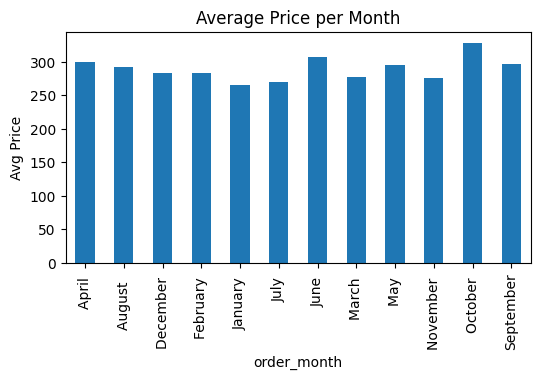

In [28]:
fig,axs = plt.subplots(1,1, figsize=(6,3))
avgprice.plot(kind='bar', ax=axs)
axs.set_title('Average Price per Month')
axs.set_ylabel("Avg Price")
plt.show()

In [16]:
#total revenue

In [18]:
dftotalrev= df[['order_year_month','total_amount']]

In [22]:
totalrev = dftotalrev.groupby('order_year_month')['total_amount'].sum()

In [23]:
totalrev.info

<bound method Series.info of order_year_month
2019-02     63785.07
2019-03    210261.46
2019-04    239062.11
2019-05    231703.01
2019-06    242822.69
2019-07    203543.83
2019-08    230135.80
2019-09    198513.63
2019-10    238674.58
2019-11    208079.16
2019-12    219359.45
2020-01    180312.31
2020-02    135898.78
2020-03     32771.50
2020-04     52323.70
2020-05     51701.74
2020-06     41903.60
2020-07     37281.10
2020-08     48808.88
2020-09     45558.78
2020-10     39963.98
2020-11     43643.86
2020-12     32974.41
2021-01     41149.47
2021-02      1106.19
2021-03      3352.33
2021-04      4649.84
2021-05      2948.02
2021-06      3457.14
2021-07      2374.08
2021-08      1364.69
Name: total_amount, dtype: float64>

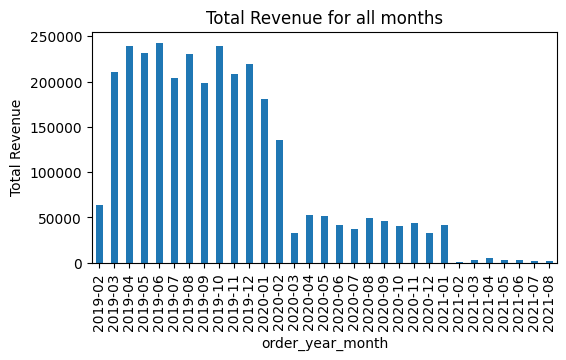

In [30]:
fig,axs = plt.subplots(1,1, figsize=(6,3))
totalrev.plot(kind='bar', ax=axs)
axs.set_title('Total Revenue for all months')
axs.set_ylabel("Total Revenue")
plt.show()